#### Rex Gayas
#### Week 4 Exercise 4.2 Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### Predicting Numerical Values 

#### Initial EDA (Revised from Week 2's Assignment)

##### Loading and Preliminary Review of Dataset

In [20]:
import pandas as pd

# Load the Dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 2\\eda_data.csv"
df = pd.read_csv(file_path)

# Initial Inspection
print("First 5 rows of the dataset:")
print(df.head())  # Display the first 5 rows to better understand the data

# Obtain a summary of the DataFrame
print("\nDataset information:")
print(df.info())  


First 5 rows of the dataset:
          x0         x1         x2        x3         x4         x5  \
0 -17.933519   6.559220 -14.452810 -4.732855   0.381673   2.563194   
1 -37.214754  10.774930 -15.384004 -0.077339  10.983774 -15.210206   
2   0.330441 -19.609972  -9.167911  2.064124  12.071688  12.506141   
3 -13.709765  -8.011390   6.759264  1.727615  -1.768382  24.039733   
4  -4.202598   7.076210 -26.004919 -4.269696  -3.414224   2.115989   

            x6          x7         x8         x9     x10       x11        x12  \
0  ($1,306.52)  -89.394348 -28.454044 -16.201298  -0.01%  0.217010   9.729891   
1     ($24.86)  153.032652 -32.557736  69.675903   0.00% -3.584908  35.727926   
2    ($110.85) -141.437276 -20.794952  55.042604   0.00% -3.991366  -9.283523   
3    ($324.43)   51.039653  -7.046908 -31.424419   0.01%  7.908897  -2.891882   
4   $1,213.37   -31.046700  19.061182 -31.525515  -0.01%  0.846719  25.497480   

        x13         y  
0 -0.786431  0.666146  
1 -0.985552  0.

##### Descriptive Statistics and Initial Data Cleaning

In [21]:
import pandas as pd

# Load the Dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 2\\eda_data.csv"
df = pd.read_csv(file_path)

# Calculate descriptive statistics for numerical columns
print(df.describe())

# Initial data cleaning: converting object-type columns to numeric where possible
# Inspect the unique values of the object-type columns to understand the non-numeric characters contained within
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())

# Define a function to clean the strings and convert them to floats
def clean_numeric(x):
    if isinstance(x, str):  # Check if the value is a string
        # Remove dollar signs, commas, and handle negative numbers represented by parentheses
        x = x.replace('$', '').replace(',', '')
        if x.startswith('(') and x.endswith(')'):
            x = '-' + x[1:-1]  # Remove parentheses and add negative sign
        # Remove percent sign and convert to proportion if it's a percentage
        if '%' in x:
            x = x.replace('%', '')
            try:
                return float(x) / 100
            except ValueError:
                return pd.NA  # Return pandas NA if conversion fails
        # Otherwise, convert the string to a float, coerce errors to NaN
        try:
            return float(x)
        except ValueError:
            return pd.NA  # Return pandas NA if conversion fails
    else:
        # If the value is not a string, return it as is (it might already be numeric)
        return x

# Apply the cleaning function to each column that is of object type
for column in object_columns:
    df[column] = df[column].apply(clean_numeric)

# Check the new data types after cleaning
print("\nData types after cleaning:")
print(df.dtypes)



                x0           x1           x2           x3           x4  \
count  9996.000000  9995.000000  9996.000000  9997.000000  9997.000000   
mean      6.501091    -3.729880    -7.335819    -0.001323     1.347141   
std      29.140034    17.237178    38.355015     3.995307     9.606695   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.094564   -15.356197   -33.079854    -2.681308    -5.047927   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.214107     7.764036    18.477979     2.635699     7.807128   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

                x5           x7           x8           x9          x11  \
count  9999.000000  9998.000000  9999.000000  9996.000000  9995.000000   
mean      1.214413    -4.239862    -0.297257   -22.482050     0.034517   
std      17.352962   131.921984    37.987287    91.723733     6.065264   
min     -59.900503  -661.764937  -142

Certain columns were read as object type due to the presence of commas and percentage signs. Cleaning function was implemented to remove non-numeric characters and convert the strings to floats. A cleaning function was applied to these columns to handle strings representing money (with dollar signs and commas) and percentages (with percent signs), converting them into a numeric format. Specifically, negative amounts were enclosed in parentheses, and percentages needed to be converted to decimal form. After applying this function, the “x6” and “x10” columns were successfully transformed from object data types to float64, indicating that they now contain clean, numeric data suitable for further analysis.

##### Handling Missing Data and Further Cleaning

In [22]:
# Clean 'object' type columns and convert to numeric
def clean_and_convert(column):
    if column.dtype == 'object':
        # Replace non-numeric characters like '$' and ',' then convert to float
        column = column.str.replace('[\$\,]', '').astype(float)
    return column

df['x6'] = clean_and_convert(df['x6'])
df['x10'] = clean_and_convert(df['x10'])

# Impute or remove missing values
# Fill missing values with the median, which is best for outliers
for col in df.columns:
    if df[col].isnull().any():
        median = df[col].median()
        df[col].fillna(median, inplace=True)

# Print unique values in 'x6' and 'x10' to verify that they have been cleaned
print("Unique values in 'x6' after cleaning:", df['x6'].unique())
print("Unique values in 'x10' after cleaning:", df['x10'].unique())

Unique values in 'x6' after cleaning: [-1306.52   -24.86  -110.85 ...   417.34 -1472.62  -863.61]
Unique values in 'x10' after cleaning: [-0.0001  0.      0.0001  0.0002 -0.0002 -0.0003  0.0003 -0.0004  0.0004]


C:\Users\RexAr\AppData\Local\Temp\ipykernel_20644\30676029.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


NaN values were noted after cleaning, which suggests that during the conversion of object types to float, some values could not be interpreted as numbers and were converted to NaN. This is possible due to the result of empty strings or non-numeric characters that couldn't be handled by pd.to_numeric() with the errors='coerce' parameter.

##### Data Visualization

                x0           x1           x2           x3           x4  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      6.501138    -3.729918    -7.335830    -0.001321     1.347115   
std      29.135661    17.233729    38.349260     3.994907     9.605734   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.091886   -15.351276   -33.072206    -2.681270    -5.047231   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.196314     7.761736    18.464243     2.635557     7.802829   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

                x5           x6           x7           x8           x9  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      1.214413    -2.969052    -4.239913    -0.297257   -22.481443   
std      17.352962   999.409148   131.915386    37.987287    91.709978   
min     -59.900503 -4496.460000  -661

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


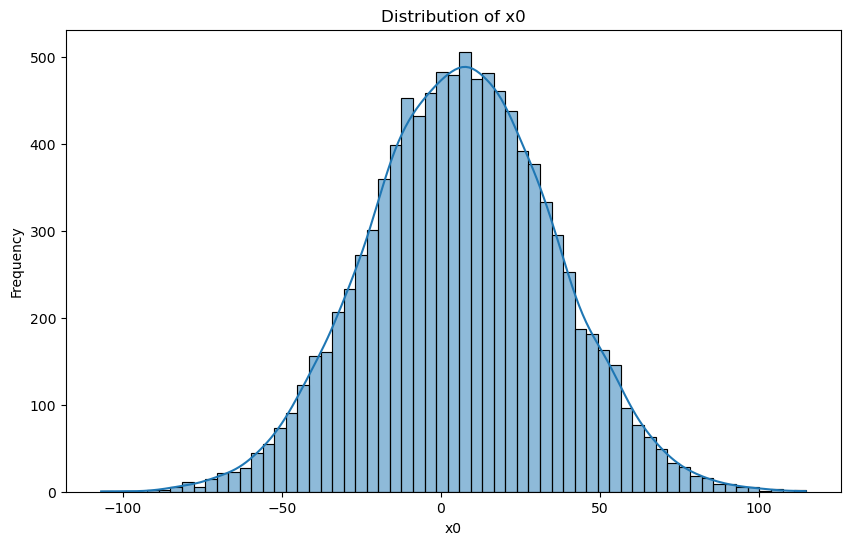

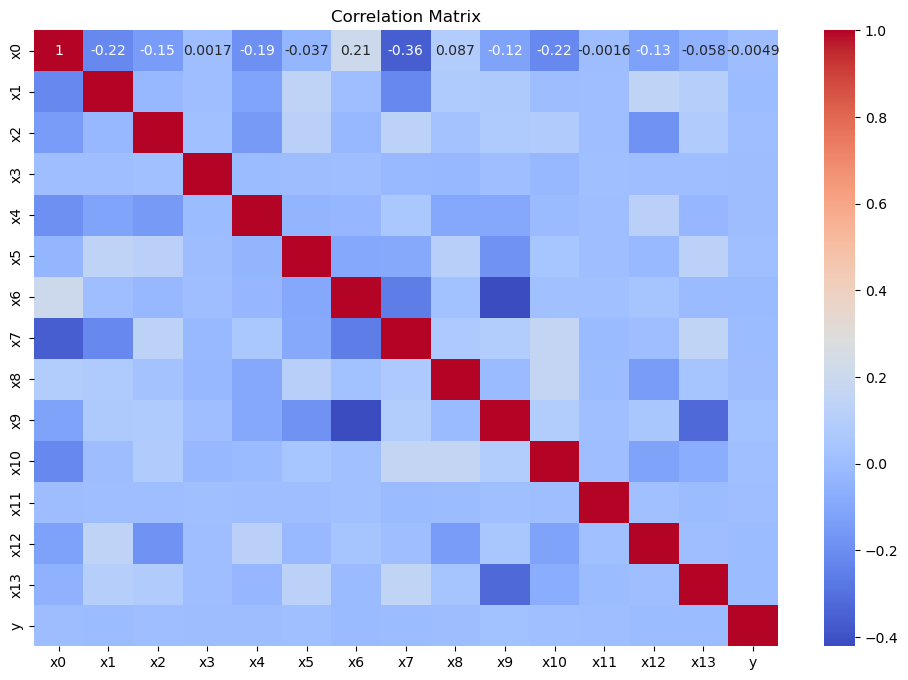

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())


# Distribution of a single column 
plt.figure(figsize=(10, 6))
sns.histplot(df['x0'], kde=True)
plt.title('Distribution of x0')
plt.xlabel('x0')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The summary statistics show that the data varies across different columns, with some columns having a standard deviation of zero, indicating no variance. This is indicative of columns containing a single value (x10) or NaN values (x6) that have been imputed with the median.

Subsequently, the correlation matrix heatmap represents the correlation coefficients between pairs of variables. It's apparent that some variables have a degree of correlation with each other, while others do not. 

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


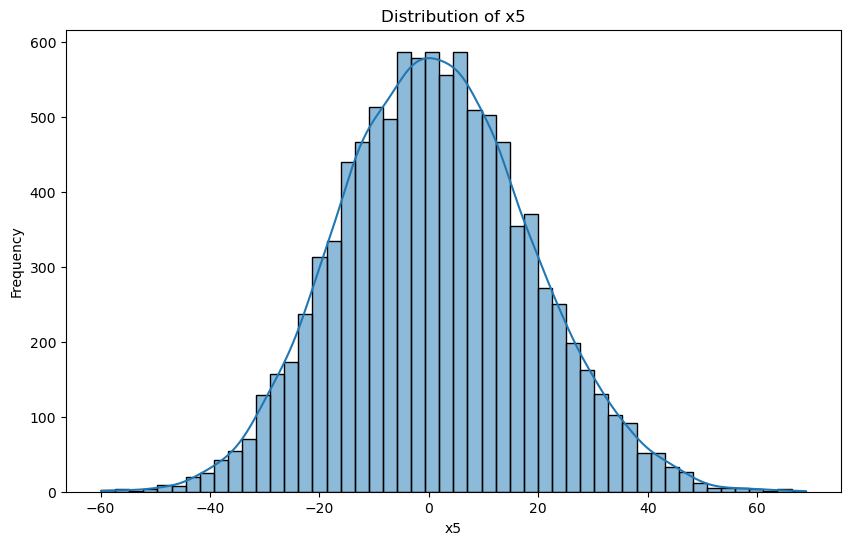

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


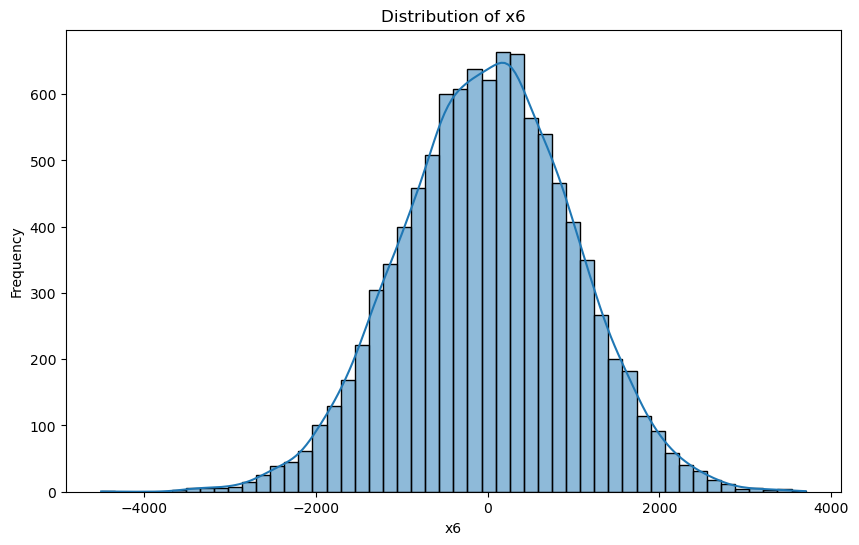

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


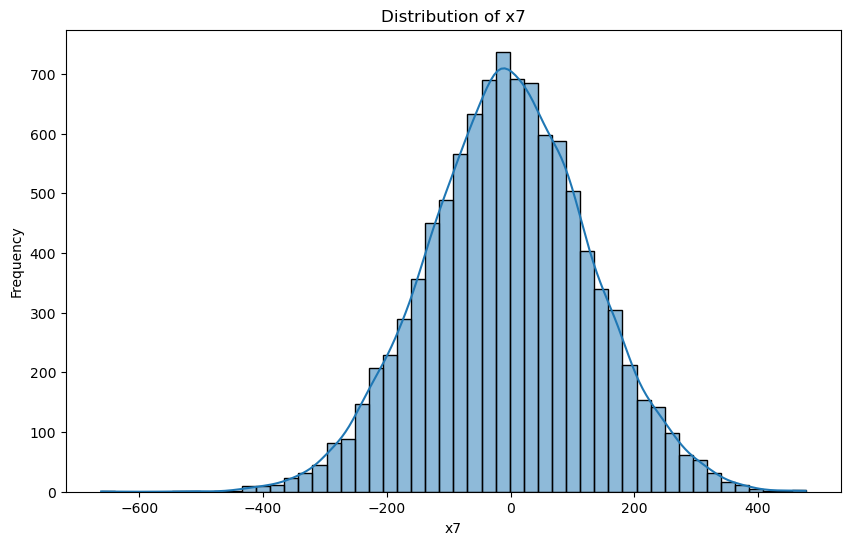

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


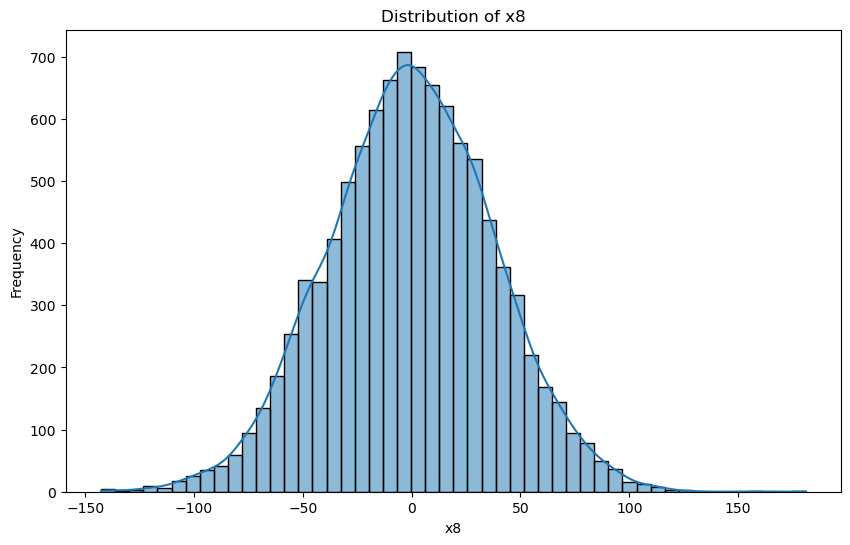

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


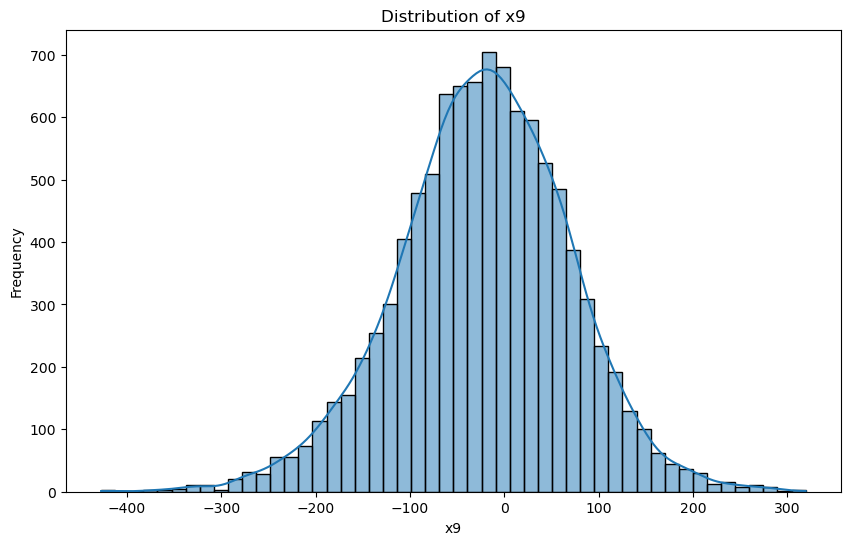

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


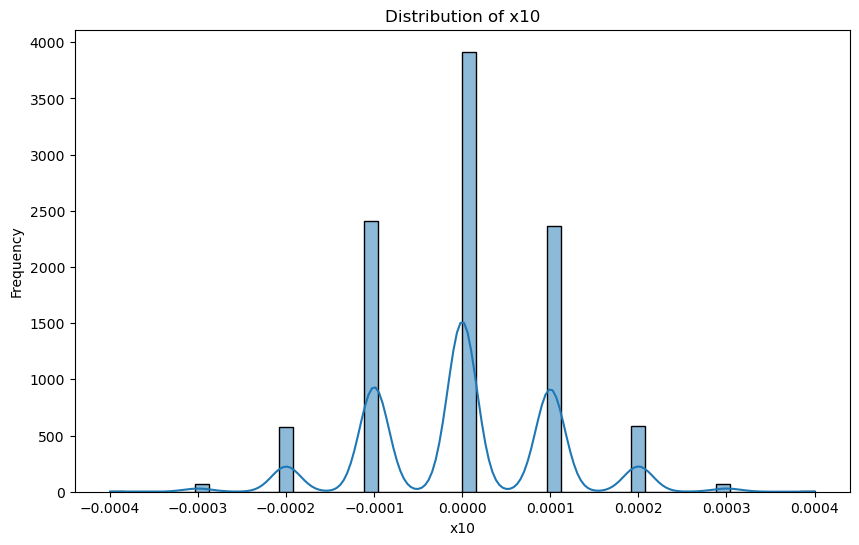

In [25]:
# Histograms for a selection of columns
selected_columns = ['x5', 'x6', 'x7', 'x8', 'x9', 'x10']

# Plotting histograms with 50 bins for each selected column
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Additional histograms were created to help visualize the zero variance in x6 and x10. 

#### Data Preparation for Predictive Modeling 

In [26]:
# Function to clean and convert currency and percentages to float
def clean_numeric(x):
    if isinstance(x, str):  # Check if the value is a string
        x = x.replace('$', '').replace(',', '')  # Remove dollar signs and commas
        x = x.strip()  # Remove any leading and trailing whitespaces
        try:
            # Convert to float
            return float(x)
        except ValueError:
            # If conversion fails, return NaN
            return np.nan
    else:
        # If the value is not a string, return it as it might already be numeric
        return x

# Apply the cleaning function to each column in the DataFrame
for column in df.columns:
    df[column] = df[column].apply(clean_numeric)


Identified and converted strings representing currency to float values, stripping away symbols like the dollar sign and commas.

#### Handling NaN Values

In [27]:
# Split the dataset into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Impute missing values with the median of each column
for column in X_train.columns:
    median = X_train[column].median()
    X_train[column].fillna(median, inplace=True)
    X_test[column].fillna(median, inplace=True)


C:\Users\RexAr\AppData\Local\Temp\ipykernel_20644\3220461727.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(median, inplace=True)
C:\Users\RexAr\AppData\Local\Temp\ipykernel_20644\3220461727.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

After the initial cleaning, encountered NaN (Not a Number) values in the dataset. To address this, a function was written to impute NaNs with the median of each column, which is one way for handling missing data in predictive modeling.

#### Dropping the "x10" Column

In [28]:
# Drop the column with all NaN values from the train and test sets
X_train = X_train.drop(columns=['x10'])
X_test = X_test.drop(columns=['x10'])


The column “x10” contained only NaN values and could not be imputed, which prompted the drop of this column entirely from both the training and testing datasets. This step ensured that the model would only be trained on features with valid numerical data.

#### Final Imputation and Data Verification

In [29]:
# Impute NaNs in the remaining columns with the median
for column in X_train.columns:
    median = X_train[column].median()
    X_train[column].fillna(median, inplace=True)
    X_test[column].fillna(median, inplace=True)

# Check for any remaining NaNs in the training and testing sets
nan_in_train_after_drop = X_train.isna().any().any()
nan_in_test_after_drop = X_test.isna().any().any()

print(nan_in_train_after_drop)
print(nan_in_test_after_drop)

False
False


C:\Users\RexAr\AppData\Local\Temp\ipykernel_20644\1903537094.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(median, inplace=True)
C:\Users\RexAr\AppData\Local\Temp\ipykernel_20644\1903537094.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

After dropping the “x10” column, performed one final round of median imputation to fill any remaining NaN values in other columns. Subsequently verified that there were no NaN values left in our datasets.

#### Model Training

In [30]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

With a clean and prepared dataset, instantiated a linear regression model, fit it with the training data, and then used it to make predictions on the test data. This is where the model “learns” from the data. It is important to note that the output doesn't indicate an error; rather, it confirms that the model object has been created successfully and is now ready to be used for fitting to the training data.

#### Model Evaluation

In [31]:
from sklearn.metrics import r2_score

# Predict the target on the testing set and calculate the R-squared score
y_pred = model.predict(X_test)
r2_score_result = r2_score(y_test, y_pred)
print (r2_score_result)

-0.005494633973059937


Evaluated the model's performance using the R-squared metric, which measures how well the independent variables predict the dependent variable. The R-squared value we obtained was negative, indicating that the model did not perform well on the test data. Additionally, it suggests that linear regression may not be the best fit for this data, which could be due to various factors like the nature of the data, outliers, or the presence of non-linear relationships.

#### Decision Tree Regressor

In [32]:
from sklearn.model_selection import train_test_split

# Set 'df' as DataFrame and 'y' as thename of the target variable column
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict the target on the testing set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate the R-squared score for the Decision Tree model
r2_score_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(r2_score_decision_tree)


-0.9233512613767298


Attempted the Decision Tree Regressor and received an R-squared score of approximately -0.9235. It is still negative and suggests that the decision tree model is performing worse than a simple horizontal line. This indicates that the model may be overfitting the training data or that there is some other significant issue with the data or how the model is being applied.

##### MSE Calculation

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for the Linear Regression model predictions
linear_regression_mse = mean_squared_error(y_test, y_pred)

# Calculate MSE for the Decision Tree model predictions
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)

# Output the MSE results
print(f'Linear Regression MSE: {linear_regression_mse}')
print(f'Decision Tree MSE: {decision_tree_mse}')


Linear Regression MSE: 0.08408240188718862
Decision Tree MSE: 0.16083625736548912


The Mean Squared Error (MSE) metric was employed to evaluate the accuracy of the Linear Regression and Decision Tree Regressor models. A lower MSE of 0.0848 for the Linear Regression model indicates more precise predictions when compared to the higher MSE of 0.1608 for the Decision Tree, which may signal overfitting or a complex model. The results suggest that the Linear Regression model is better suited as it provided predictions that are on average closer to the true values.

#### Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set df as DataFrame after cleaning and preprocessing
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the training data and calculate R-squared
y_train_pred = ridge_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R-squared: {train_r2}')

# Predict on the test data
y_test_pred = ridge_model.predict(X_test)

# Calculate R-squared for the test data
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test R-squared: {test_r2}')


Training R-squared: 0.0018436740002576446
Test R-squared: -0.005494667352422766


Attempted the Ridge Regression model to try to predict the data but ended up with a negative R-squared value on the test set, meaning it did worse than a simple average. This suggests that the model, with its current settings, isn't capturing the patterns in the data well, and it could be due to the data's complexity or unusual data points throwing off the predictions.

##### MSE Calculation

In [36]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mse, test_mse


(0.08300471052860199, 0.08408240467846854)

The code calculates the Mean Squared Error (MSE) for both the training and test datasets of a predictive model. The results show MSE values of approximately 0.083 for the training set and 0.0848 for the test set. These values indicate that the model's predictions are fairly consistent between the training and testing phases, suggesting the model is stable; however, the negative R-squared value points to its poor predictive power or a possible lack of fit to the data.

#### Concluding Analysis

Multiple regression models, including Linear Regression and Ridge Regression, were applied to forecast the “y” column. The persistent negative R-squared values across these models signaled an inadequate predictive capability, suggesting that the models were unsuitable for capturing the underlying pattern of the dataset. Upon revising the Exploratory Data Analysis (EDA) process from Week 2's assignment, a critical transformation was addressed based on Professor Neugebauer's feedback regarding the treatment of negative values in the “x6” column. By converting parenthesized numbers to their negative counterparts, the adjustment altered the “x6” data distribution, which is now accurately represented in its histogram, displaying a correct reflection of the data's nature. Despite these improvements and more accurately preprocessed data, the model's lack of fit indicates the need for further refinement, possibly through more advanced modeling techniques or additional feature engineering.

#### References

- Bhattacharyya, S. (2018, September 26). Ridge and Lasso Regression: L1 and L2 Regularization. TowardsDataScience. [https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)
- Fuentes, A. (2018, December 28). Hands-On Predictive Analytics with Python. Packt Publishing Ltd.
- Jean, H. (2020). Essential Math for Data Science. Haliotis Publishing.
- JJ. (2016, March 23). MAE and RMSE — Which Metric is Better? _Medium_. Retrieved from [https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)
